Importing Libaries

In [1]:
import pandas as pd #used for data manipulation
import numpy as np #used for numerical analysis
from collections import Counter as c # return counts of number of classess
import matplotlib.pyplot as plt #used for data Visualization
import seaborn as sns #data visualization library
import missingno as msno #finding missing values
from sklearn.metrics import accuracy_score, confusion_matrix#model performance
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.preprocessing import LabelEncoder #encoding the levels of categorical features
from sklearn.linear_model import LogisticRegression #Classification ML algorithm
import pickle #Python object hierarchy is converted into a byte stream

Loading the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


Data Pre-Processing

In [3]:
data=pd.read_csv("kidney_disease.csv")
data.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [4]:
data.tail()

id   age    bp     sg   al   su     rbc      pc         pcc          ba  \
395  395  55.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal  normal  notpresent  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   

     ...  pcv    wc   rc  htn  dm  cad appet  pe ane classification  
395  ...   47  6700  4.9   no  no   no  good  no  no         notckd  
396  ...   54  7800  6.2   no  no   no  good  no  no         notckd  
397  ...   49  6600  5.4   no  no   no  good  no  no         notckd  
398  ...   51  7200  5.9   no  no   no  good  no  no         notckd  
399  ...   53  6800  6.1   no  no   no  good  no  no         notckd  

[5 rows x 26 columns]

In [5]:
data.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

Dropping id column

In [6]:
data.drop(["id"],axis=1,inplace=True)

Renaming the Column Names

In [7]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
data.columns=['age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']

In [9]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

Understanding the data type and its summary

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [11]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [12]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [13]:
data.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood glucose random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  hemoglobin  
count  312.000000  348.000000  
mean     4.627244   12.526437  
std      3.193904    2.912587  
min      2.500000    3.100000  
25%      3.800000   10.300000  
50%      4.400000   12.650000  
75%      4.900000   15.000000  
max     47.000000   17.800000

Observing Target,Categorical and Numerical Columns

Target Column

In [14]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

Rectifying the Target Column

In [ ]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [15]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('float64'), dtype('O')], dtype=object), array([11, 14]))

In [16]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('float64'), dtype('O')], dtype=object), array([11, 14]))

In [17]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

Categorical Columns

In [18]:
catcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(catcols)

{'red_blood_cell_count', 'bacteria', 'pus_cell_clumps', 'class', 'pus_cell', 'appetite', 'sugar', 'hypertension', 'potassium', 'sodium', 'age', 'hemoglobin', 'red_blood_cells', 'albumin', 'blood_urea', 'specific_gravity', 'blood_pressure', 'blood glucose random', 'pedal_edema', 'coronary_artery_disease', 'serum_creatinine', 'packed_cell_volume', 'anemia', 'diabetesmellitus', 'white_blood_cell_count'}


In [19]:
for i in catcols:
  print("Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

Columns: red_blood_cell_count
Counter({nan: 130, '5.2': 18, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6.0': 4, '6.3': 4, '4.0': 3, '4': 3, '3.5': 3, '3.3': 3, '5': 2, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '3.0': 2, '2.3': 1, '8.0': 1, '3': 1, '2.4': 1, '\t?': 1})
************************************************************************************************************************

Columns: bacteria
Counter({'notpresent': 378, 'present': 22})
************************************************************************************************************************

Columns: pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
*************************************************************************************

In [20]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'bacteria', 'pus_cell_clumps', 'class', 'pus_cell', 'appetite', 'sugar', 'hypertension', 'potassium', 'sodium', 'age', 'hemoglobin', 'red_blood_cells', 'albumin', 'blood_urea', 'specific_gravity', 'blood_pressure', 'blood glucose random', 'pedal_edema', 'coronary_artery_disease', 'serum_creatinine', 'anemia', 'diabetesmellitus'}


In [21]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(contcols)

{'red_blood_cell_count', 'bacteria', 'pus_cell_clumps', 'class', 'pus_cell', 'appetite', 'sugar', 'hypertension', 'potassium', 'sodium', 'age', 'hemoglobin', 'red_blood_cells', 'albumin', 'blood_urea', 'specific_gravity', 'blood_pressure', 'blood glucose random', 'pedal_edema', 'coronary_artery_disease', 'serum_creatinine', 'packed_cell_volume', 'anemia', 'diabetesmellitus', 'white_blood_cell_count'}


In [22]:
for i in contcols:
  print("Continous Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

Continous Columns: red_blood_cell_count
Counter({nan: 130, '5.2': 18, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '4.4': 5, '3.2': 5, '4.1': 5, '6.2': 5, '5.1': 5, '6.4': 5, '5.7': 5, '6.5': 5, '3.6': 4, '6.0': 4, '6.3': 4, '4.0': 3, '4': 3, '3.5': 3, '3.3': 3, '5': 2, '2.6': 2, '2.8': 2, '2.5': 2, '3.1': 2, '2.1': 2, '2.9': 2, '2.7': 2, '3.0': 2, '2.3': 1, '8.0': 1, '3': 1, '2.4': 1, '\t?': 1})
************************************************************************************************************************

Continous Columns: bacteria
Counter({'notpresent': 378, 'present': 22})
************************************************************************************************************************

Continous Columns: pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
*******************************************************

Removing the Columns Which are not categorical

In [23]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'red_blood_cell_count', 'bacteria', 'pus_cell_clumps', 'class', 'pus_cell', 'appetite', 'hypertension', 'potassium', 'sodium', 'age', 'hemoglobin', 'red_blood_cells', 'blood_urea', 'blood_pressure', 'blood glucose random', 'pedal_edema', 'coronary_artery_disease', 'serum_creatinine', 'packed_cell_volume', 'anemia', 'diabetesmellitus', 'white_blood_cell_count'}


In [24]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'red_blood_cell_count', 'bacteria', 'pus_cell_clumps', 'class', 'pus_cell', 'appetite', 'hypertension', 'potassium', 'sodium', 'age', 'hemoglobin', 'red_blood_cells', 'blood_urea', 'blood_pressure', 'blood glucose random', 'pedal_edema', 'coronary_artery_disease', 'serum_creatinine', 'packed_cell_volume', 'anemia', 'diabetesmellitus', 'white_blood_cell_count'}


In [25]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'bacteria', 'pus_cell_clumps', 'class', 'pus_cell', 'appetite', 'sugar', 'hypertension', 'potassium', 'sodium', 'age', 'hemoglobin', 'red_blood_cells', 'albumin', 'blood_urea', 'specific_gravity', 'blood_pressure', 'blood glucose random', 'pedal_edema', 'coronary_artery_disease', 'serum_creatinine', 'anemia', 'diabetesmellitus'}


In [26]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 366, 'yes': 34})

In [27]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 136, 'no': 263, ' yes': 1})

In [28]:
data.isnull().any()

age                        False
blood_pressure              True
specific_gravity           False
albumin                    False
sugar                      False
red_blood_cells            False
pus_cell                   False
pus_cell_clumps            False
bacteria                   False
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension               False
diabetesmellitus           False
coronary_artery_disease    False
appetite                   False
pedal_edema                False
anemia                     False
class                      False
dtype: bool

In [29]:
data.isnull().sum()

age                          0
blood_pressure              12
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells              0
pus_cell                     0
pus_cell_clumps              0
bacteria                     0
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 0
diabetesmellitus             0
coronary_artery_disease      0
appetite                     0
pedal_edema                  0
anemia                       0
class                        0
dtype: int64

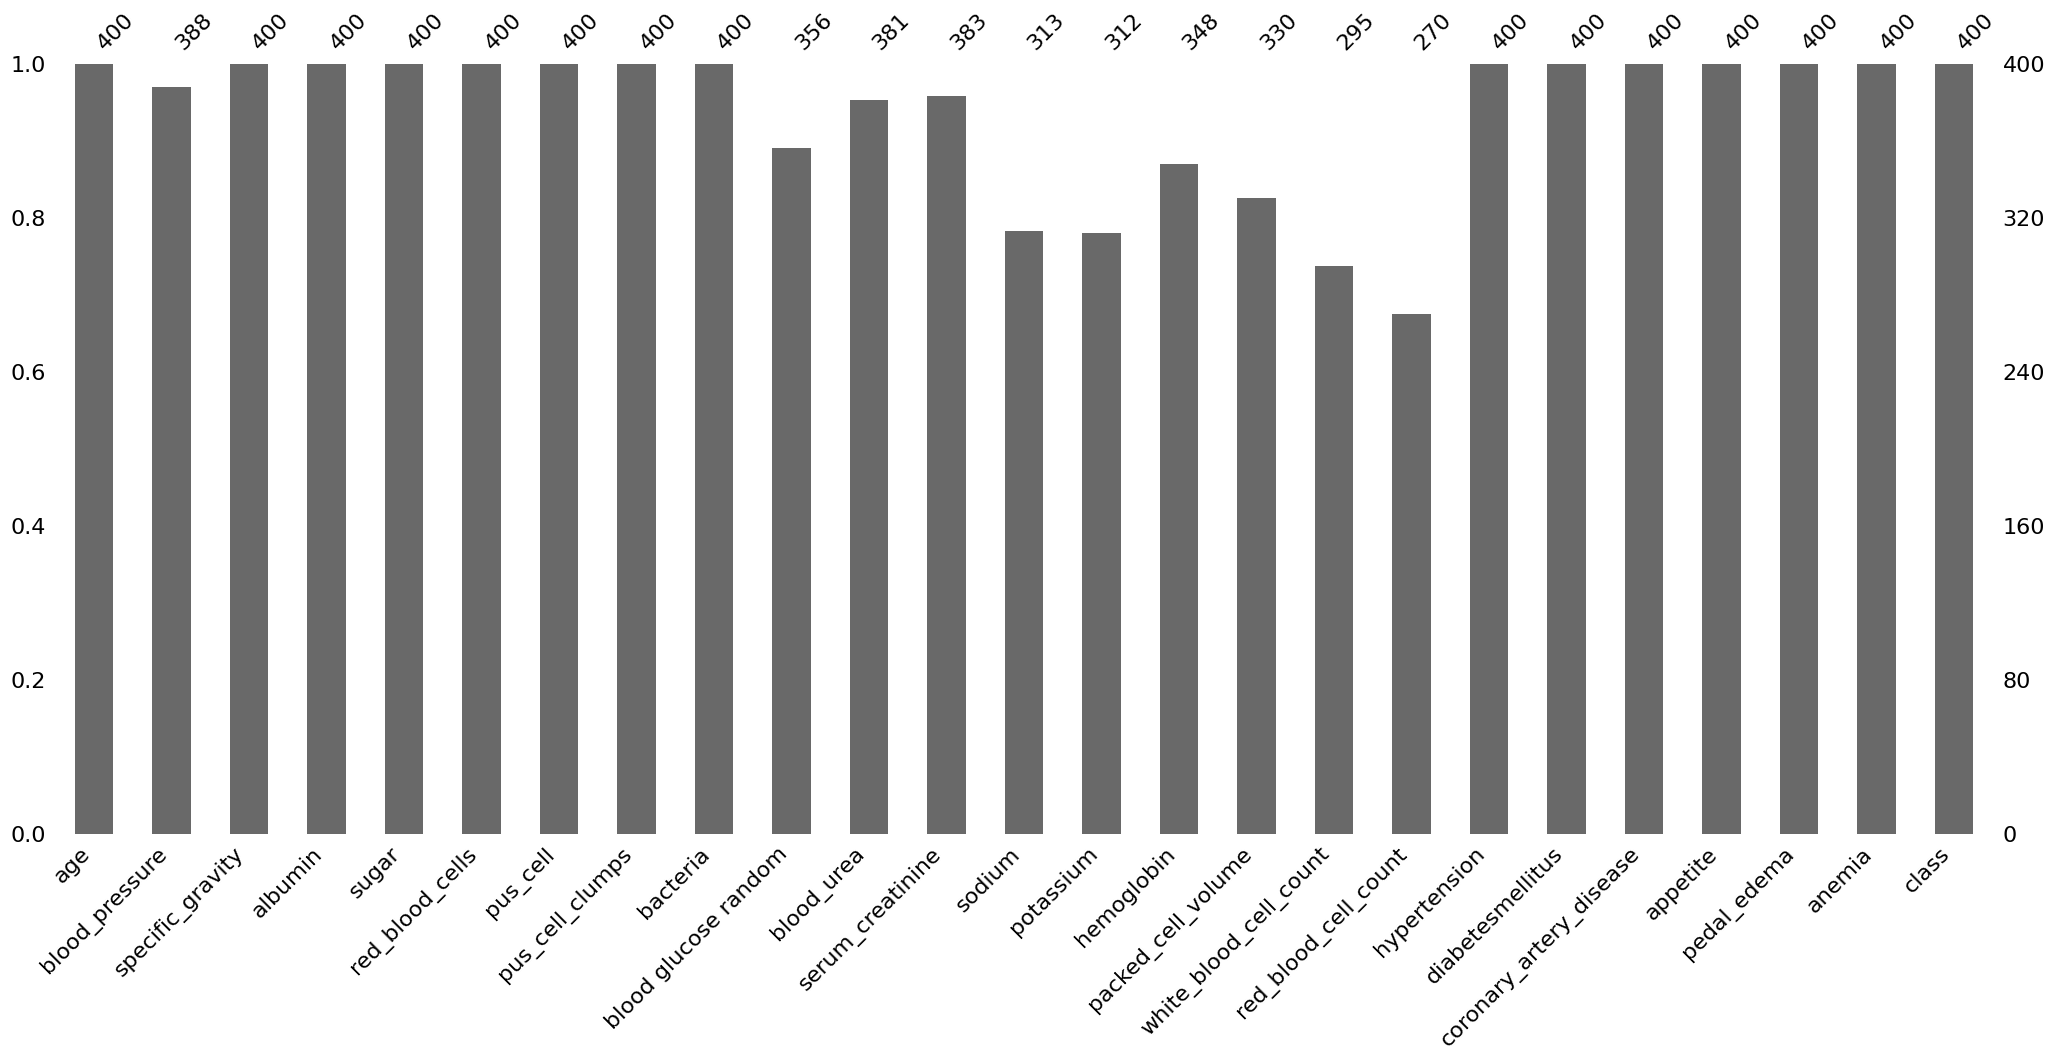

In [30]:
msno.bar(data)
plt.show()

In [31]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

In [32]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


In [33]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [34]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood glucose random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [35]:
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
         'hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [36]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi=LabelEncoder()
  print(c(data[i]))
  data[i]=LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF: coronary_arter

Text(0.5, 1.0, 'age VS blood Scatter Plot')

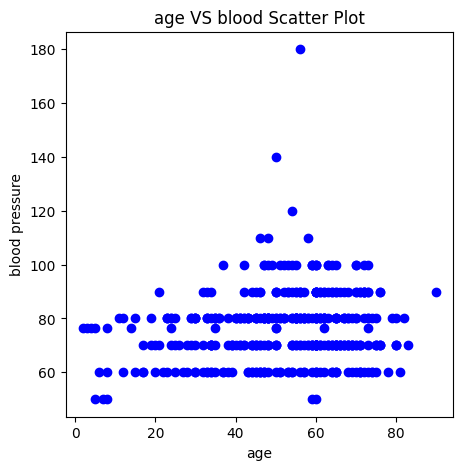

In [37]:
import matplotlib.pyplot as plt # import the matplotlib libaray 
fig=plt.figure(figsize=(5,5)) #plot size
plt.scatter(data['age'],data['blood_pressure'],color='blue') 
plt.xlabel('age') #set the label for x-axis
plt.ylabel('blood pressure') #set the label for y-axis
plt.title("age VS blood Scatter Plot") #set a title for the axes


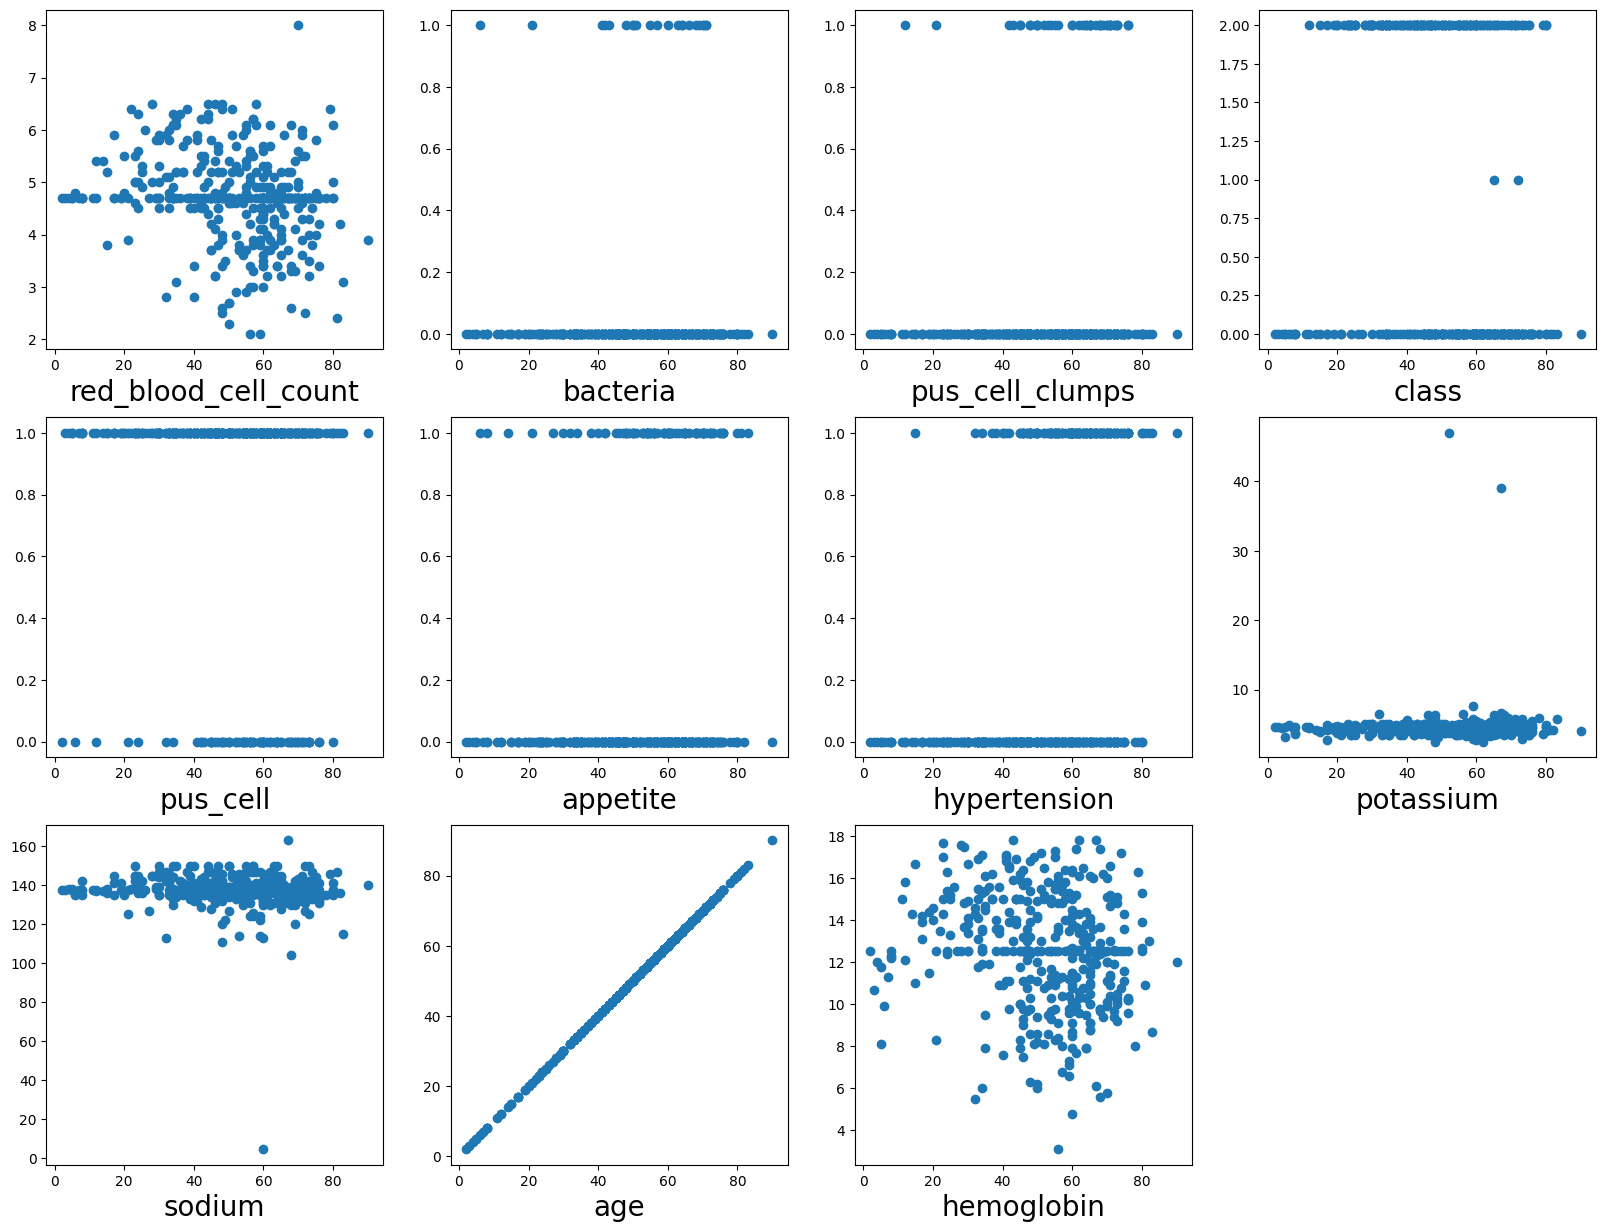

In [38]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber<=11 :
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(data['age'],data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

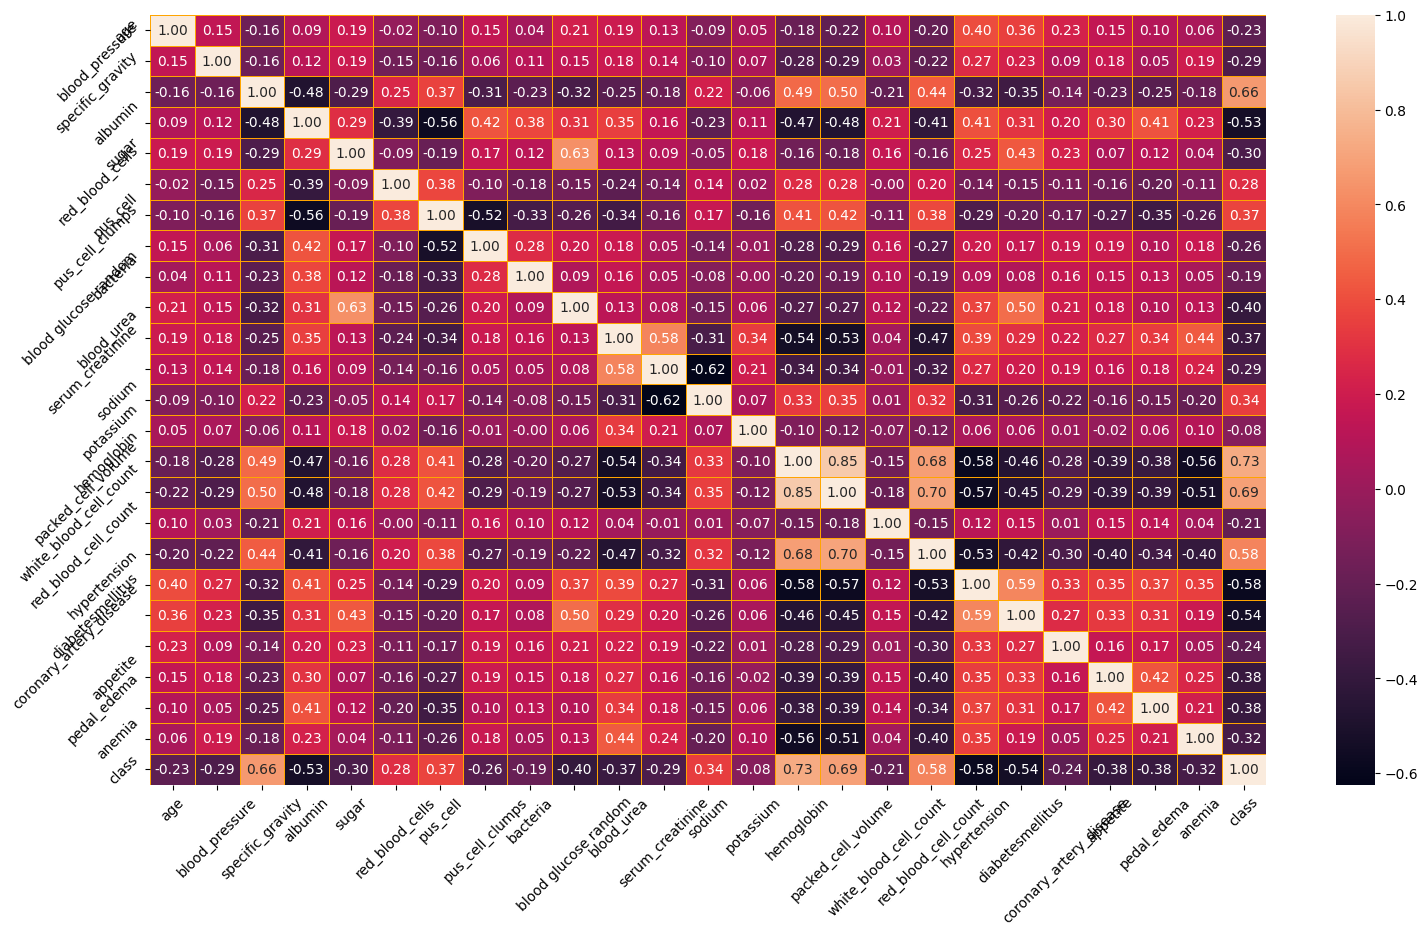

In [39]:
f,ax=plt.subplots(figsize=(18,10)) 
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [40]:
data['class'].unique()

array([0, 1, 2])

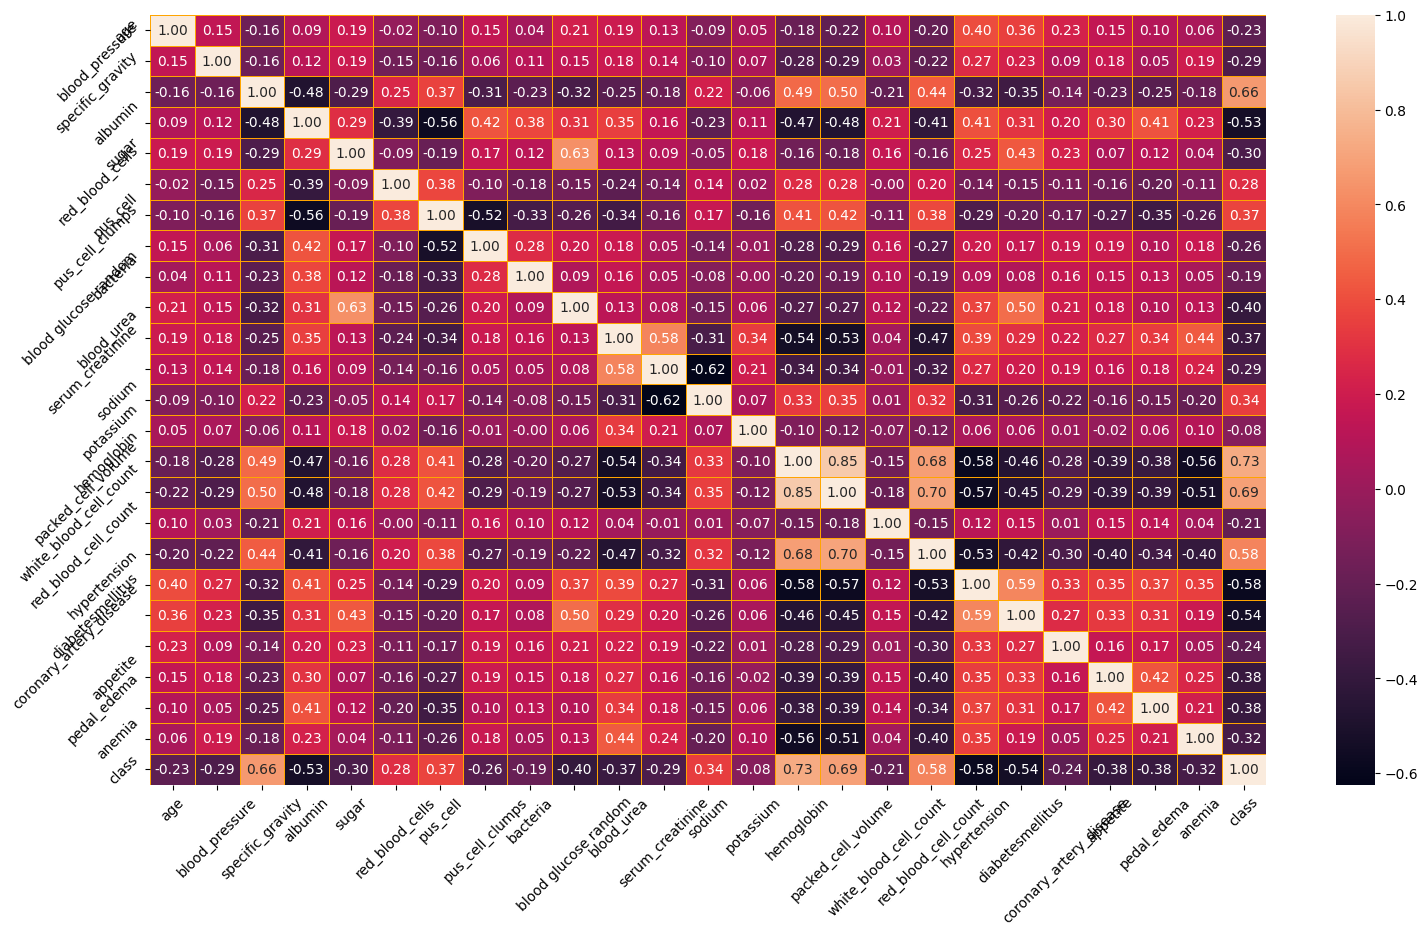

In [41]:
f,ax=plt.subplots(figsize=(18,10)) 
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

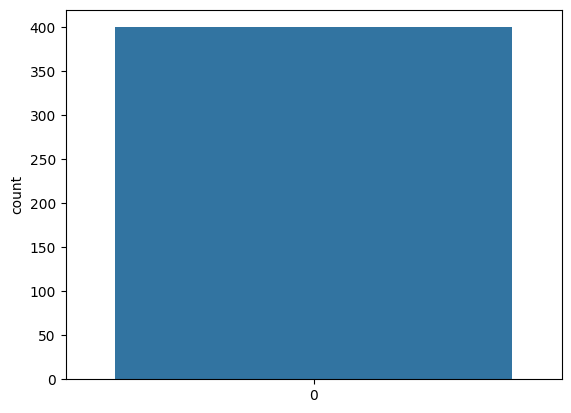

In [42]:
sns.countplot(data['class'])

In [43]:
selcols=['red_blood_cells','pus_cell', 'blood glucose random','blood_urea',
            'pedal_edema', 'anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)#train test split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


In [45]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = lgr.predict([[129,99,1,0,0,1,0,1]])

print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [47]:
y_pred = lgr.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred)

0.9125

In [49]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat                         

array([[47,  0,  6],
       [ 1,  0,  0],
       [ 0,  0, 26]])

In [50]:

pickle.dump(lgr, open('CKD.pk1','wb'))

In [51]:
contcols

{'age',
 'anemia',
 'appetite',
 'bacteria',
 'blood glucose random',
 'blood_pressure',
 'blood_urea',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hemoglobin',
 'hypertension',
 'packed_cell_volume',
 'pedal_edema',
 'potassium',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cell_count',
 'red_blood_cells',
 'serum_creatinine',
 'sodium',
 'white_blood_cell_count'}

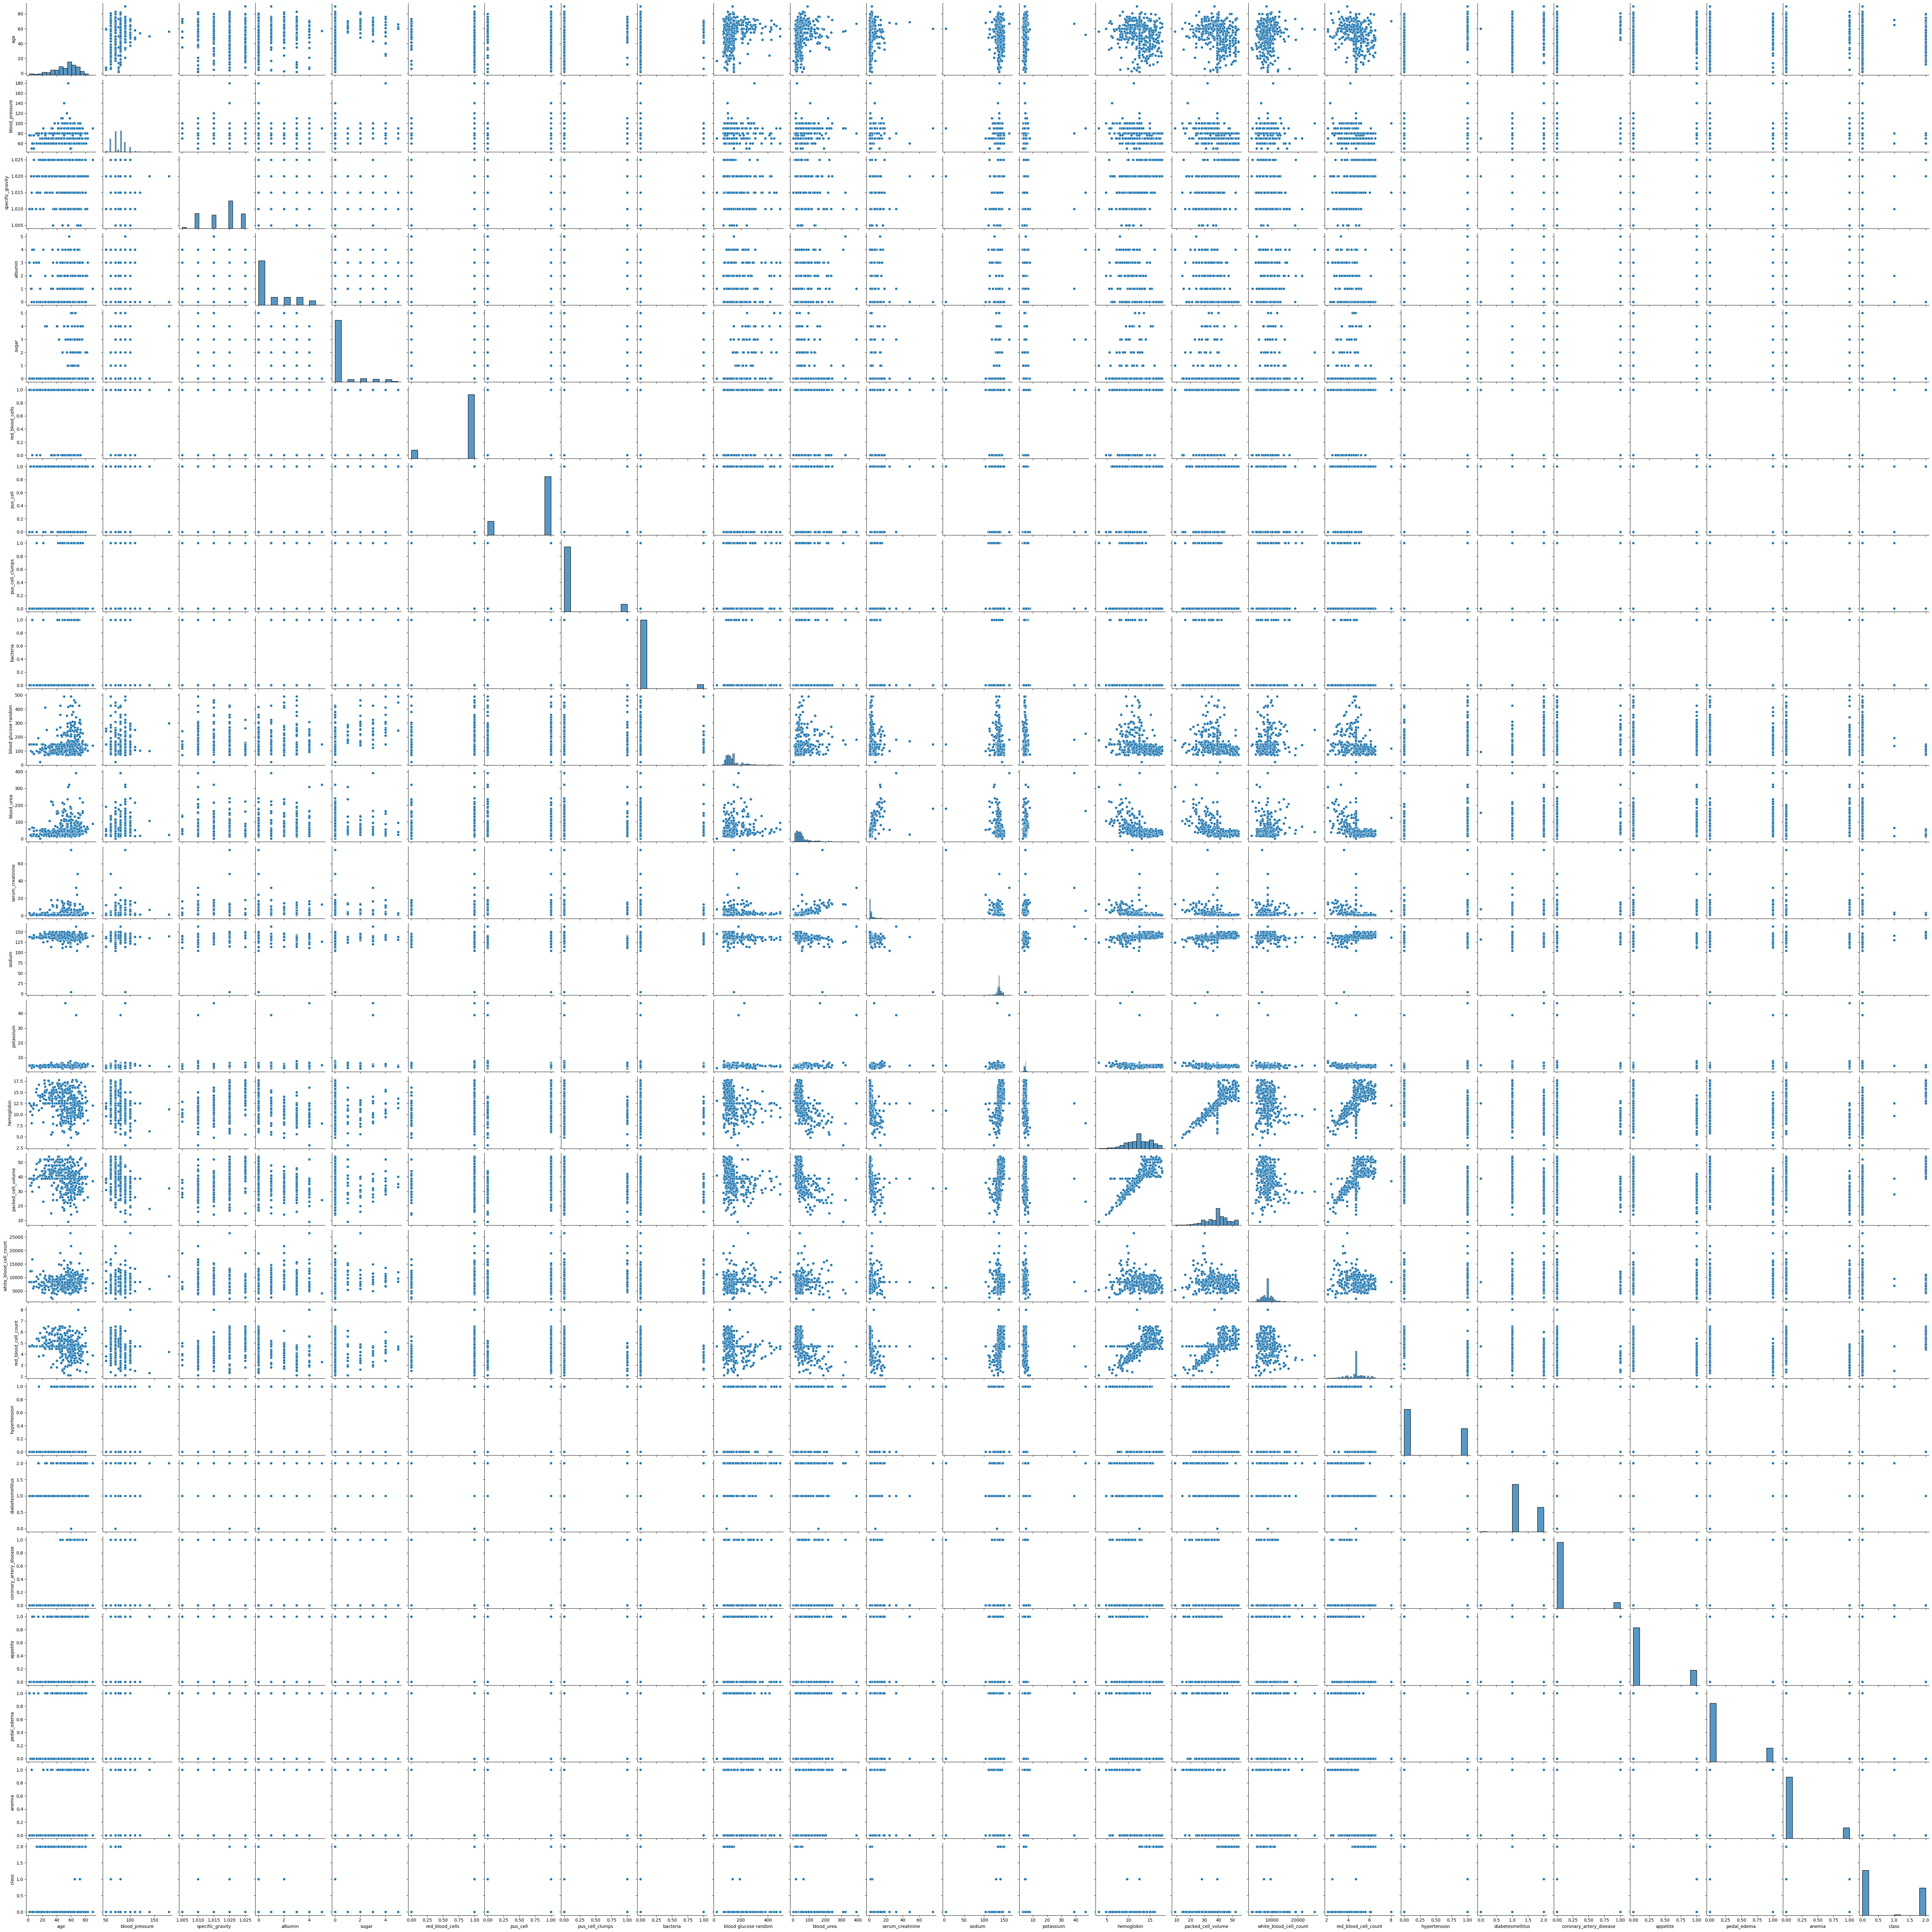

In [55]:
sns.pairplot(data)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)

In [56]:
y

class
0        0
1        0
2        0
3        0
4        0
..     ...
395      2
396      2
397      2
398      2
399      2

[400 rows x 1 columns]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [58]:
x.head()

red_blood_cells  pus_cell  blood glucose random  blood_urea  pedal_edema  \
0                1         1            121.000000        36.0            0   
1                1         1            148.036517        18.0            0   
2                1         1            423.000000        53.0            0   
3                1         0            117.000000        56.0            1   
4                1         1            106.000000        26.0            0   

   anemia  diabetesmellitus  coronary_artery_disease  
0       0                 2                        0  
1       0                 1                        0  
2       1                 2                        0  
3       1                 1                        0  
4       0                 1                        0

In [59]:
pd.DataFrame(x_bal)

0         1         2         3         4         5         6  \
0    0.36489  0.484322 -0.361987 -0.435268 -0.484322 -0.420084  1.385651   
1    0.36489  0.484322  0.000000 -0.800941 -0.484322 -0.420084 -0.705897   
2    0.36489  0.484322  3.681441 -0.089909 -0.484322  2.380476  1.385651   
3    0.36489 -2.064742 -0.415543 -0.028964  2.064742  2.380476 -0.705897   
4    0.36489  0.484322 -0.562820 -0.638420 -0.484322 -0.420084 -0.705897   
..       ...       ...       ...       ...       ...       ...       ...   
395  0.36489  0.484322 -0.107600 -0.171170 -0.484322 -0.420084 -0.705897   
396  0.36489  0.484322 -0.977874 -0.536844 -0.484322 -0.420084 -0.705897   
397  0.36489  0.484322 -0.643153 -0.638420 -0.484322 -0.420084 -0.705897   
398  0.36489  0.484322 -0.455709 -0.150855 -0.484322 -0.420084 -0.705897   
399  0.36489  0.484322 -0.228099 -0.800941 -0.484322 -0.420084 -0.705897   

            7  
0   -0.304789  
1   -0.304789  
2   -0.304789  
3   -0.304789  
4   -0.304789  
..        ...  
395 -0.304789  
396 -0.304789  
397 -0.304789  
398 -0.304789  
399 -0.304789  

[400 rows x 8 columns]

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)

In [61]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [63]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 2s 14ms/step - loss: 1.2800 - accuracy: 0.5742 - val_loss: 0.5709 - val_accuracy: 0.6562
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6129 - accuracy: 0.5938 - val_loss: 0.5452 - val_accuracy: 0.6562
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.6094 - val_loss: 0.5644 - val_accuracy: 0.6562
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5756 - accuracy: 0.5820 - val_loss: 0.5635 - val_accuracy: 0.6562
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.6250 - val_loss: 0.6338 - val_accuracy: 0.5156
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5479 - accuracy: 0.6133 - val_loss: 0.5285 - val_accuracy: 0.6562
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5461 - accuracy: 0.6211 - val_loss: 0.5241 - val_accuracy: 0.6562
Epoch 8/100


In [64]:
y_pred = classification.predict(x_test)

3/3 [==============================] - 0s 5ms/step


In [65]:
y_pred

array([[0.82876444],
       [0.95834136],
       [0.99983156],
       [0.91613483],
       [0.80525964],
       [0.8743007 ],
       [0.99974436],
       [0.98965836],
       [0.92371   ],
       [0.9606575 ],
       [0.9932727 ],
       [0.82235587],
       [0.9255054 ],
       [0.7471907 ],
       [0.9919974 ],
       [0.91544294],
       [0.9983546 ],
       [0.8943161 ],
       [0.9249675 ],
       [0.99983186],
       [0.8573694 ],
       [0.92202264],
       [0.99967694],
       [0.8621994 ],
       [0.99988955],
       [0.9112936 ],
       [0.9794832 ],
       [0.8364167 ],
       [0.8181989 ],
       [0.95017844],
       [0.93706226],
       [0.90983224],
       [0.94169337],
       [0.9584512 ],
       [0.99992704],
       [0.9952186 ],
       [0.86400574],
       [0.9964393 ],
       [0.9221683 ],
       [0.8305685 ],
       [0.90456694],
       [0.9420167 ],
       [0.95076126],
       [0.9407095 ],
       [0.92893064],
       [0.8967475 ],
       [0.8447614 ],
       [0.878

In [66]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0, 53,  0],
       [ 0,  1,  0],
       [ 0, 26,  0]])

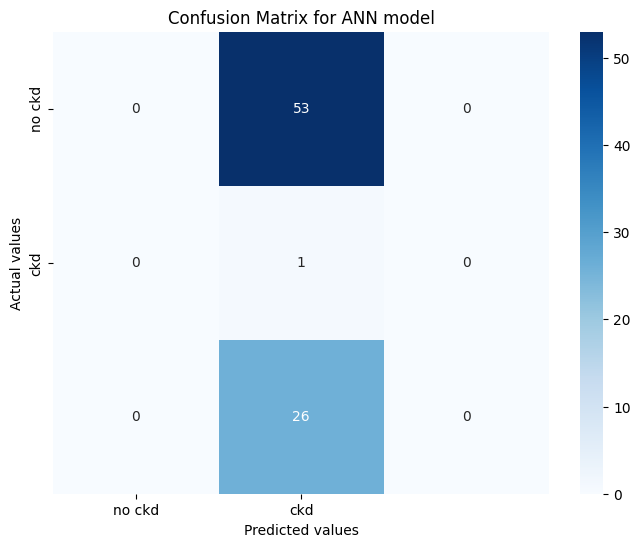

In [68]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [69]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 1.25%


In [70]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
    sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
    sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
    sample_value = sc.transform(sample_value)

    return classifier.predict(sample_value)

In [71]:
x.head()

red_blood_cells  pus_cell  blood glucose random  blood_urea  pedal_edema  \
0                1         1            121.000000        36.0            0   
1                1         1            148.036517        18.0            0   
2                1         1            423.000000        53.0            0   
3                1         0            117.000000        56.0            1   
4                1         1            106.000000        26.0            0   

   anemia  diabetesmellitus  coronary_artery_disease  
0       0                 2                        0  
1       0                 1                        0  
2       1                 2                        0  
3       1                 1                        0  
4       0                 1                        0

In [72]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: Low chance of CKD.')

1/1 [==============================] - 0s 82ms/step
Prediction: Low chance of CKD.


In [73]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.01      1.00      0.02         1
           2       0.00      0.00      0.00        26

    accuracy                           0.01        80
   macro avg       0.00      0.33      0.01        80
weighted avg       0.00      0.01      0.00        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
from sklearn.metrics import accuracy_score,classification_report

y_predict = lgr.predict(x_test)

In [76]:
print('Train accuracy score of LOG_RE:',lgr.score(x_train, y_train))
print('Test accuracy score of LOG_RE:',lgr.score(x_test, y_test))

Train accuracy score of LOG_RE: 0.903125
Test accuracy score of LOG_RE: 0.9125


In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[47,  0,  6],
       [ 1,  0,  0],
       [ 0,  0, 26]])

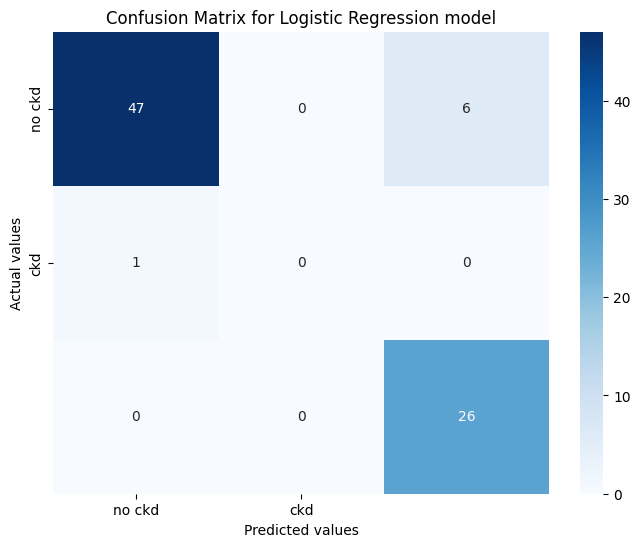

In [78]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [79]:
def logistic(x_train,x_test,y_train,y_test):
  lgr.fit(x_train,y_train)
  y_predict = lgr.predict(x_test)
  print("")


In [80]:
def Logistic(x_train,x_test,y_train,y_test):
    lgr=LogisticRegression()
    logistic=lgr.fit(x_train,y_train)
    predict_logistic=logistic.predict(x_test)
    training_accuracy=logistic.score(x_train,y_train)
    testing_accuracy=logistic.score(x_test,y_test)
    print("*** Logistic Regression ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_logistic))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_logistic))
    print("** Classification Report **")
    print(classification_report(y_test,predict_logistic))

In [81]:
Logistic(x_train,x_test,y_train,y_test)

*** Logistic Regression ***
Training Accuracy :  0.903125
Testing Accuracy :  0.9125
Accuracy Score :  0.9125
** Confusion Matrix **
[[47  0  6]
 [ 1  0  0]
 [ 0  0 26]]
** Classification Report **
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.00      0.00      0.00         1
           2       0.81      1.00      0.90        26

    accuracy                           0.91        80
   macro avg       0.60      0.63      0.61        80
weighted avg       0.91      0.91      0.91        80



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

In [82]:
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.00      0.00      0.00         1
           2       0.81      1.00      0.90        26

    accuracy                           0.91        80
   macro avg       0.60      0.63      0.61        80
weighted avg       0.91      0.91      0.91        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
y_pred = lgr.predict([[129,99,1,0,0,1,0,1]])

print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [84]:
y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[2]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [85]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [86]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [87]:
y_predict= dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0])

In [88]:
y_predict_train = dtc.predict(x_train)

In [90]:
print('Testing accuracy = ', accuracy_score(y_test,y_predict))
print("Training accuracy= ",accuracy_score(y_train,y_predict_train))

Testing accuracy =  0.95
Training accuracy=  0.915625


In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[51,  0,  2],
       [ 1,  0,  0],
       [ 1,  0, 25]])

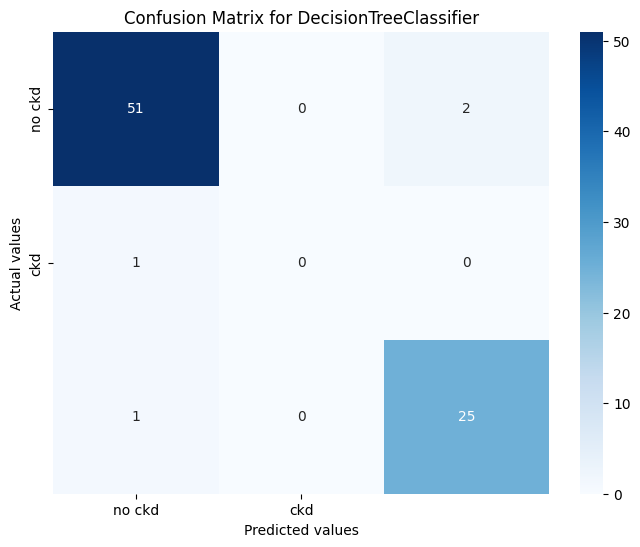

In [92]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [93]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.00      0.00      0.00         1
           2       0.93      0.96      0.94        26

    accuracy                           0.95        80
   macro avg       0.63      0.64      0.64        80
weighted avg       0.94      0.95      0.94        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [95]:
rfc.fit(x_train,y_train)

<ipython-input-95-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [96]:
y_predict = rfc.predict(x_test)

In [97]:
y_predict_train = rfc.predict(x_train)

In [98]:
print('Training accuracy: ',accuracy_score(y_train,y_predict_train))
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

Training accuracy:  0.98125
Testing accuracy:  0.9375


In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[51,  0,  2],
       [ 1,  0,  0],
       [ 2,  0, 24]])

In [100]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.00      0.00      0.00         1
           2       0.92      0.92      0.92        26

    accuracy                           0.94        80
   macro avg       0.62      0.63      0.63        80
weighted avg       0.93      0.94      0.93        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
y_train.value_counts()

class
0        195
2        124
1          1
dtype: int64

In [103]:
from sklearn.neural_network import MLPClassifier

In [104]:
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('DecisionTree',DecisionTreeClassifier()),
          ('ANN',MLPClassifier())
        ]